In the theory of vibrations of a circular drum, the displacement of the drumhead can be expressed in terms of pure harmonic modes, 

$$J_m(\omega_{k,m} r) \cos(m\theta) \cos(c \omega_{k,m} t),$$

where $(r,\theta)$ are polar coordinates, $0\le r\le 1$, $t$ is time, $m$ is a positive integer, $c$ is a material parameter, and $J_m$ is a _Bessel function of the first kind_. The quantity $\omega_{k,m}$ is a resonant frequency and is a positive root of the equation  

$$J_m(\omega_{k,m}) = 0,$$ 

which states that the drumhead is clamped around the rim. Tabulating approximations to the zeros of Bessel functions has occupied countless mathematician-hours throughout the centuries. 

In [1]:
using SpecialFunctions,Plots 

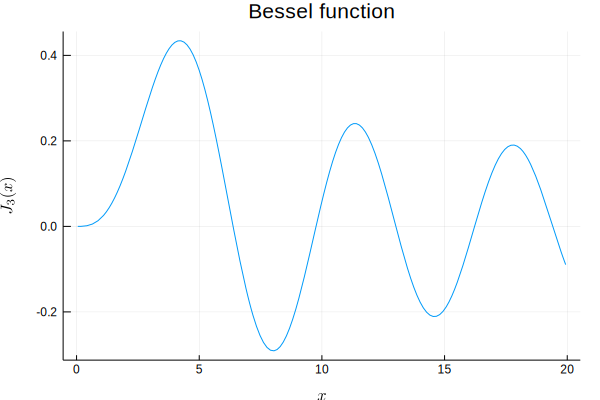

In [2]:
J3(x) = besselj(3,x)
plot(J3,0,20,
    grid=:xy,legend=:none,
    xaxis=("\$x\$"),yaxis=("\$J_3(x)\$"),title="Bessel function")

From the graph we see roots near 6, 10, 13, 16, and 19. We use `nlsolve` from the `NLsolve` package to find these roots accurately. (It uses vector variables, so we have to adapt it for use with scalars.)

In [3]:
using NLsolve
omega = []
for guess = [6.,10.,13.,16.,19.]
    s = nlsolve(x->besselj(3,x[1]),[guess])
    omega = [omega;s.zero]
end
omega

5-element Array{Any,1}:
  6.380161895923975
  9.761023129981334
 13.015200721696122
 16.223466160318768
 19.40941522643161 

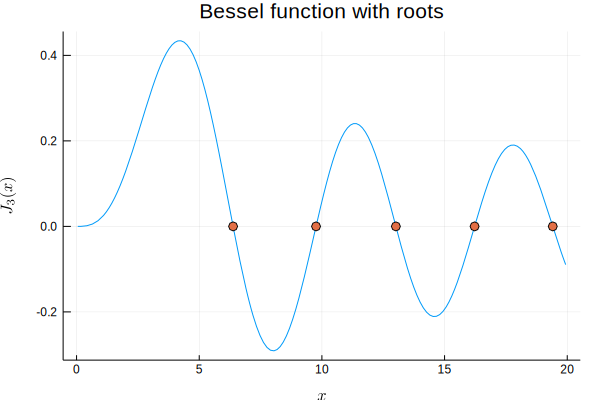

In [4]:
plot!(omega,J3.(omega),m=:o,l=nothing,title="Bessel function with roots")